In [2]:
#importing the dependencies

import re
import string
import nltk
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\ok\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk.corpus import twitter_samples

# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

print("Type of all_positive_tweets is:", type(all_positive_tweets))
print("Length of all_positive_tweets is:", len(all_positive_tweets))
print("\n")
print("Type of all_negative_tweets is:", type(all_negative_tweets))
print("Length of all_negative_tweets is:", len(all_negative_tweets))

Type of all_positive_tweets is: <class 'list'>
Length of all_positive_tweets is: 5000


Type of all_negative_tweets is: <class 'list'>
Length of all_negative_tweets is: 5000


In [14]:
all_positive_tweets[2222]

'😂😂thank you! :D https://t.co/V6aV6doasy'

# Preprocess raw text for Sentiment analysis

In [19]:
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings


def preprocess_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    stopwords_english = stopwords.words('english')
    
    #first task is to remove garbage like rt, #, html links etc from sentence using re
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    #now we can tokenize my tweet
    tweet_tokens = tokenizer.tokenize(tweet)    #it will contain some stopwords & punctuations
    
    tweet_clean = []
    
    for word in tweet_tokens:
        if (word not in stopwords_english) and (word not in string.punctuation):
            tweet_clean.append(stemmer.stem(word))
        else:
            continue
            
    return tweet_clean  

In [35]:
print('\033[92m' + all_positive_tweets[222])
print('\033[90m',"After preprocessing, the output list is ")
print('\033[94m', preprocess_tweet(all_positive_tweets[222]))

@ShawnMendes turning 17 in 15 days...omg. at least we have only 3 years difference :)
 After preprocessing, the output list is 
 ['turn', '17', '15', 'day', '...', 'omg', 'least', '3', 'year', 'differ', ':)']


In [36]:
#constructing a frequency dictionary with key as (word, label): value

def build_freqs(X_tweets, y):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    
    #to make sure that numpy y gets converted to y of type list
    y_l = np.squeeze(y).tolist()
    
    freq = {}   #empty dictionary
    
    for tweet, y_i in zip(X_tweets, y_l):
        for word in preprocess_tweet(tweet):
            
            if (word,y_i) in freq:
                freq[(word,y_i)] +=1
            else:
                freq[(word,y_i)] =1
                
    return freq

In [40]:
#Trial Output
#Buildin the X, y and dict

X = all_positive_tweets + all_negative_tweets
y = np.append(np.ones(len(all_positive_tweets)), np.zeros(len(all_negative_tweets)))


freq_table = build_freqs(X,y)

In [41]:
print(freq_table)

{('followfriday', 1.0): 25, ('top', 1.0): 32, ('engag', 1.0): 7, ('member', 1.0): 16, ('commun', 1.0): 33, ('week', 1.0): 83, (':)', 1.0): 3568, ('hey', 1.0): 76, ('jame', 1.0): 7, ('odd', 1.0): 2, (':/', 1.0): 5, ('pleas', 1.0): 97, ('call', 1.0): 37, ('contact', 1.0): 7, ('centr', 1.0): 2, ('02392441234', 1.0): 1, ('abl', 1.0): 8, ('assist', 1.0): 1, ('mani', 1.0): 33, ('thank', 1.0): 620, ('listen', 1.0): 16, ('last', 1.0): 47, ('night', 1.0): 68, ('bleed', 1.0): 2, ('amaz', 1.0): 51, ('track', 1.0): 5, ('scotland', 1.0): 2, ('congrat', 1.0): 21, ('yeaaah', 1.0): 1, ('yipppi', 1.0): 1, ('accnt', 1.0): 2, ('verifi', 1.0): 2, ('rqst', 1.0): 1, ('succeed', 1.0): 1, ('got', 1.0): 69, ('blue', 1.0): 9, ('tick', 1.0): 1, ('mark', 1.0): 1, ('fb', 1.0): 6, ('profil', 1.0): 2, ('15', 1.0): 5, ('day', 1.0): 246, ('one', 1.0): 129, ('irresist', 1.0): 2, ('flipkartfashionfriday', 1.0): 17, ('like', 1.0): 233, ('keep', 1.0): 68, ('love', 1.0): 400, ('custom', 1.0): 4, ('wait', 1.0): 70, ('long',

In [46]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']


x_values = np.zeros(len(keys))
y_values = np.zeros(len(keys))

for i in range(len(keys)):
    x_values[i] = freq_table.get((keys[i],1),0)
    y_values[i] = freq_table.get((keys[i],0),0)
    
x_log = np.log(x_values +1)
y_log = np.log(y_values +1)

C:\Users\ok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56850 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128556 missing from current font.
  font.load_char(ord(s), flags=flags)
C:\Users\ok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ok\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56845 missing from current font.
  f

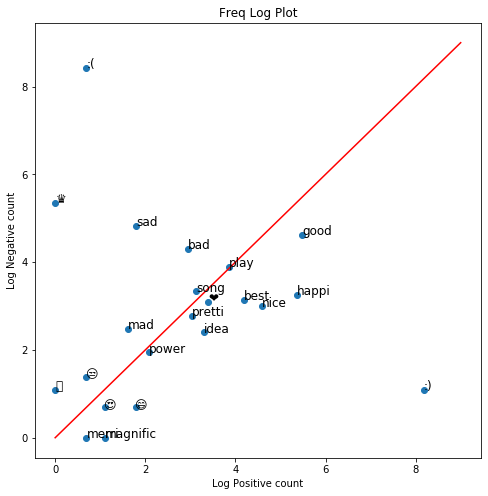

In [50]:
#Plotting an scatter plot

fig, ax = plt.subplots(figsize = (8,8))
ax.scatter(x_log, y_log)

plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")
plt.title("Freq Log Plot")
#plt.show()

# Add the word as the label at the same position as you added the points just before
for i in range(len(keys)):
    ax.annotate(keys[i], (x_log[i], y_log[i]), fontsize = 12)
    
ax.plot([0, 9], [0, 9], color = 'red')
plt.show()

# Building the logistic model

In [51]:
#dividing the data into ration of 80:20 between train & test

train_X_pos = all_positive_tweets[:4000]
train_X_neg = all_negative_tweets[:4000]

test_X_pos = all_positive_tweets[4000:]
test_X_neg = all_negative_tweets[4000:]

train_X = train_X_pos + train_X_neg
test_X = test_X_pos + test_X_neg

print("Type of train_X is", type(train_X))
print("Type of test_X is", type(test_X))
print("\n")
print("Length of train_X is", len(train_X))
print("Length of test_X is", len(test_X))

Type of train_X is <class 'list'>
Type of test_X is <class 'list'>


Length of train_X is 8000
Length of test_X is 2000


In [52]:
train_y = np.append(np.ones(len(train_X_pos)), np.zeros(len(train_X_neg)))
test_y = np.append(np.ones(len(test_X_pos)), np.zeros(len(test_X_neg)))

print("Type of train_y is", type(train_y))
print("Type of test_y is", type(test_y))
print("\n")
print("Length of train_y is", len(train_y))
print("Length of test_y is", len(test_y))

Type of train_y is <class 'numpy.ndarray'>
Type of test_y is <class 'numpy.ndarray'>


Length of train_y is 8000
Length of test_y is 2000


In [55]:
#create a frequency directory

model_freq = build_freqs(train_X, train_y)
print("Type of model_freq is:", type(model_freq))
print("Count fo keys in model_freq is:", len(model_freq.keys()))

Type of model_freq is: <class 'dict'>
Count fo keys in model_freq is: 11346


In [62]:
print("Type of model_freq is:", type(model_freq))
print("Count fo keys in model_freq is:", len(model_freq.keys()))

Type of model_freq is: <class 'dict'>
Count fo keys in model_freq is: 11346


**Building a logistic regression model**

In [58]:
def sigmoid(z):
    val = 1/(1 + np.exp(-z))
    return val

In [82]:

def gradientDescent(x, y, theta, alpha = 0.00001, num_iters= 1000):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    hist = []
    m = x.shape[0]
    for i in range(num_iters):
        z = np.dot(x, theta)
        h = sigmoid(z)
        
        J = -1*(np.dot(y.T, np.log(h)) + np.dot((1-y).T, np.log(1-h)))/m
        hist.append(float(J))
        
        print("Cost at iteration " + str(i) + ":" + str(float(J)))
        
        theta = theta - ((alpha/m)*(np.dot(x.T, (h-y))))
        
    return float(J), theta, hist

**Feature Extraction**

In [154]:
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    tweet_p = preprocess_tweet(tweet)
    x = np.zeros((1,3))
    pos = 0
    neg = 0
    x[0][0] = 1
    for word in tweet_p:
        x[0][1] += model_freq.get((word,1),0)
        x[0][2] += model_freq.get((word,0),0)
        
    assert(x.shape == (1,3))
    return x

In [133]:
#Training Time

def features_matrix(X_list):
    n = len(X_list)
    
    data_matrix = np.zeros((n, 3))
    
    for i in range(len(X_list)):
        data_matrix[i,:] = extract_features(X_list[i], model_freq)
        
    return data_matrix

In [137]:
#For Train_data
d = train_y.shape[0]
X = features_matrix(train_X)
Y = train_y.reshape((d,1))

# Apply gradient descent
J, theta, hist = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 15000)

Cost at iteration 0:0.6931471805599468
Cost at iteration 1:0.6920758608084742
Cost at iteration 2:0.6910078342698172
Cost at iteration 3:0.6899430896928689
Cost at iteration 4:0.6888816158289541
Cost at iteration 5:0.6878234014324639
Cost at iteration 6:0.686768435261493
Cost at iteration 7:0.6857167060784743
Cost at iteration 8:0.6846682026508131
Cost at iteration 9:0.6836229137515215
Cost at iteration 10:0.6825808281598479
Cost at iteration 11:0.6815419346619062
Cost at iteration 12:0.6805062220513032
Cost at iteration 13:0.6794736791297601
Cost at iteration 14:0.6784442947077357
Cost at iteration 15:0.6774180576050425
Cost at iteration 16:0.6763949566514587
Cost at iteration 17:0.6753749806873418
Cost at iteration 18:0.6743581185642303
Cost at iteration 19:0.6733443591454474
Cost at iteration 20:0.6723336913066954
Cost at iteration 21:0.671326103936648
Cost at iteration 22:0.6703215859375378
Cost at iteration 23:0.6693201262257346
Cost at iteration 24:0.6683217137323211
Cost at iter

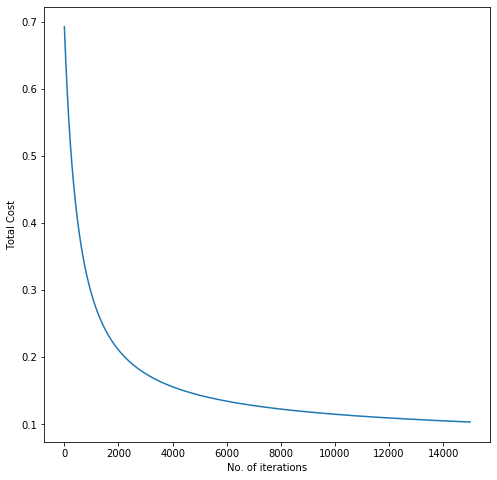

In [138]:
r = len(hist)
x_val = np.array(list(range(1, r+1)))
y_val = np.array(hist)

fig, ax = plt.subplots(figsize =(8,8))
ax.plot(x_val, y_val)
plt.xlabel("No. of iterations")
plt.ylabel("Total Cost")
plt.show()

In [139]:
theta

array([[ 5.26121148e-07],
       [ 1.48855911e-03],
       [-1.22391692e-03]])

**Model analysis on the test dataset** 

In [148]:
#Test Set

X_test = features_matrix(test_X)
y_test = test_y.reshape((2000,1))

y_predicted = sigmoid(np.dot(X_test, theta))    #Probability estimation
y_hat = np.where(y_predicted >= 0.5,1.0,0.0)    #Class prediction as 1,0

In [155]:
def accuracy(y_actual, y_predicted):
    y_actual = np.squeeze(y_actual)
    y_predicted = np.squeeze(y_predicted)
    
    accuracy = np.sum(y_actual == y_predicted)/y_actual.shape[0]
    error = 1 - accuracy
    
    return accuracy,error

In [157]:
acc, err = accuracy(y_test, y_hat)
print("The model's accuracy is :", acc)
print("The model's error is :", round(err,4))

The model's accuracy is : 0.9945
The model's error is : 0.0055


In [158]:
def confusion_matrix(y_actual, y_predicted):
    y_actual = np.squeeze(y_actual)
    y_predicted = np.squeeze(y_predicted)
    
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    
    for i in range(y_actual.shape[0]):
        if (y_actual[i] == y_predicted[i]) and (y_actual[i] == 1.0):
            TP += 1
        elif (y_actual[i] == y_predicted[i]) and (y_actual[i] == 0.0):
            TN += 1
        elif (y_actual[i] != y_predicted[i]) and y_actual[i] == 0.0 and y_predicted[i] == 1.0 :
            FP += 1
        elif (y_actual[i] != y_predicted[i]) and y_actual[i] == 1.0 and y_predicted[i] == 0.0 :
            FN += 1
    
    
    return TP, FP, FN, TN

In [159]:
TP, FP, FN, TN = confusion_matrix(y_test, y_hat)

In [172]:
cf = [["OP", "Real 1" , "Real 0"], ["Machine 1", TP , FP], ["Machine 0", FN , TN]] 

In [173]:
print(np.array(cf))


[['OP' 'Real 1' 'Real 0']
 ['Machine 1' '996' '7']
 ['Machine 0' '4' '993']]
